<a href="https://colab.research.google.com/github/ArtemFilosofGB/PythonForAnalyst/blob/main/Homework02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 4. Визуальный анализ данных

## Условие 1: Задача 1
Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы


1.1. Скачать следующие данные: kc-house-data и laptop_price

1.2. Изучите стоимости недвижимости

1.3. Изучите распределение квадратуры жилой

1.4. Изучите распределение года постройки


## Условие 2: 2 задача

2.1. Изучите распределение домов от наличия вида на набережную

Постройте график

Сделайте выводы

2.2. Изучите распределение этажей домов

2.3. Изучите распределение состояния домов


## Условие 3: 3 задача

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('kc_house_data.csv')
df.head()



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [29]:
#1.2. Изучите стоимости недвижимости
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

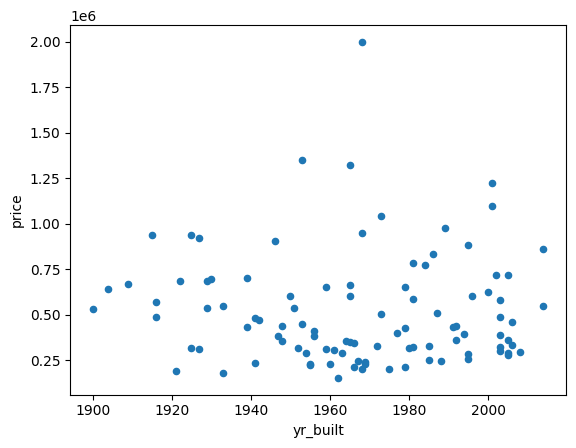

In [30]:

df.iloc[:100].plot.scatter(x='yr_built', y='price');

In [31]:
df[['price','sqft_living','yr_built']].describe()

,price,sqft_living,yr_built
count,2.161300e+04,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,1971.005136
std,3.671272e+05,918.440897,29.373411
min,7.500000e+04,290.000000,1900.000000
25%,3.219500e+05,1427.000000,1951.000000
50%,4.500000e+05,1910.000000,1975.000000
75%,6.450000e+05,2550.000000,1997.000000
max,7.700000e+06,13540.000000,2015.000000


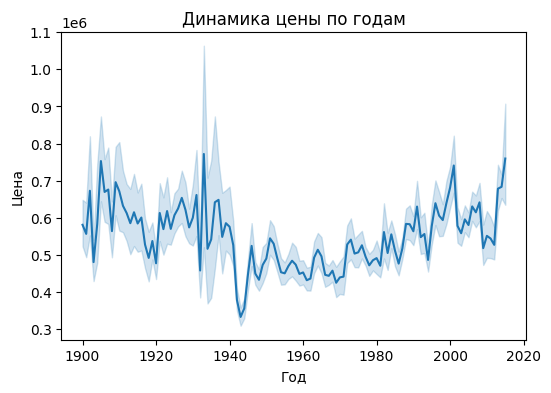

In [3]:
# 1.2. Изучите стоимости недвижимости
plt.figure(figsize=(6, 4))

sns.lineplot(x=df['yr_built'], y=df['price'])

plt.title('Динамика цены по годам')
plt.xlabel('Год')
plt.ylabel('Цена');

Вывод: Спад цены окло 1940-1950 годов. После 1980 виден новый подьём.

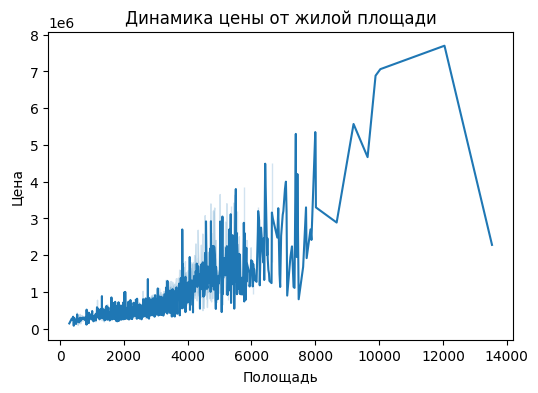

In [4]:
# 1.3. Изучите распределение квадратуры жилой
plt.figure(figsize=(6, 4))

sns.lineplot(x=df['sqft_living'], y=df['price'])

plt.title('Динамика цены от жилой площади')
plt.xlabel('Полощадь')
plt.ylabel('Цена');

Наблюдаем линейную зависимость - Чем больше площадьтем дороже цена дома.

Также видим что плотность данных неравномерна, возможно присутствуют ошибки данных.

Разброс цены больше с площади 4000 и далее. 

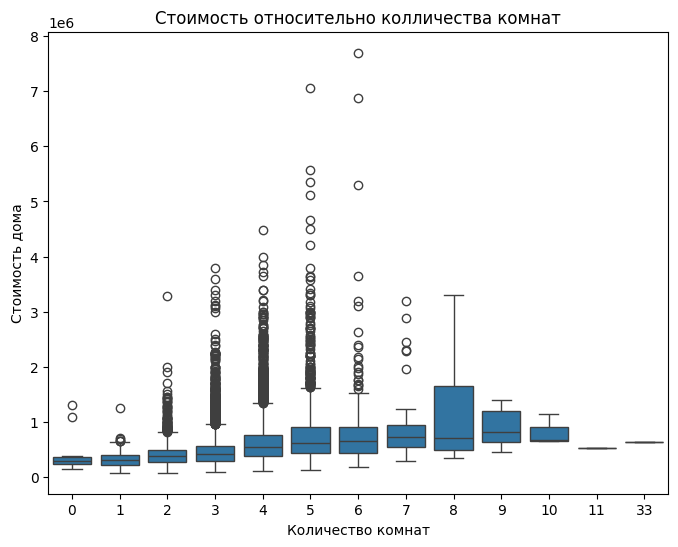

In [6]:
#График распределения стоимости недвижимости по количеству комнат
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='bedrooms', y='price')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость дома')
plt.title('Стоимость относительно колличества комнат')
plt.show()

Вывод: Вероятно мы наблюдаем выбросы,- ошибочные данные явно заметны в верхней части графика, как отдельно стоящие кружки. Мало вероятно что стоимость домов с 5 спальнями в несколько раз больше домов с 7 спальнями.

Дома с 8ю комнатами имеют самый большой разброс в цене.

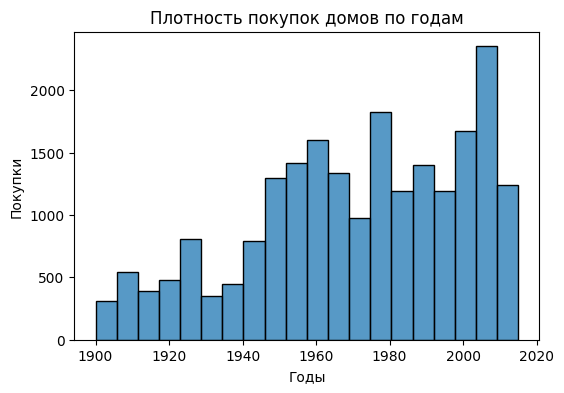

In [7]:
# 1.4. Изучите распределение года постройки
plt.figure(figsize=(6, 4))

sns.histplot(df['yr_built'], bins=20)

plt.title('Плотность покупок домов по годам')
plt.xlabel('Годы')
plt.ylabel('Покупки');

Наблюдаем: скачёк интереса к недвижимости около 1950г, пик в 1960. Максисмум около 2008-2010г. 

В целом Колличество сделок склонно увеличиваться.

Условие 2: 2 задача

2.1. Изучите распределение домов от наличия вида на набережную

Постройте график

Сделайте выводы

2.2. Изучите распределение этажей домов

2.3. Изучите распределение состояния домов


In [58]:
df['waterfront']
# Строим круговую диаграмму
# Готовим данные для графика
data = df['waterfront'].value_counts()
data.index = ['no', 'yes']
data.head()



no     21450
yes      163
Name: count, dtype: int64

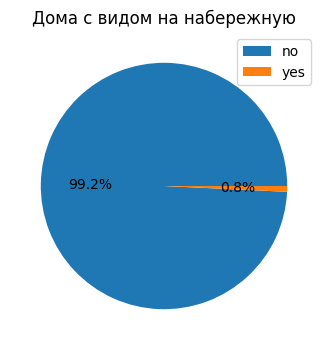

In [60]:
plt.figure(figsize=(6, 4))

plt.pie(data, autopct='%1.1f%%')

plt.title('Дома с видом на набережную')
plt.legend(data.index);

Вывод: Сделки с домами с видом на набережную большая редкость.

In [62]:
df['view']
# Строим круговую диаграмму
# Готовим данные для графика
data = df['view'].value_counts()
data.head()


view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

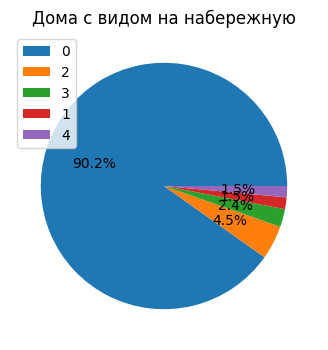

In [63]:
plt.figure(figsize=(6, 4))

plt.pie(data, autopct='%1.1f%%')
plt.title('Дома с видом на набережную')
plt.legend(data.index);

Выыод: домов с видом на набережную и с хорошим видом гораздо меньше обычных домов 

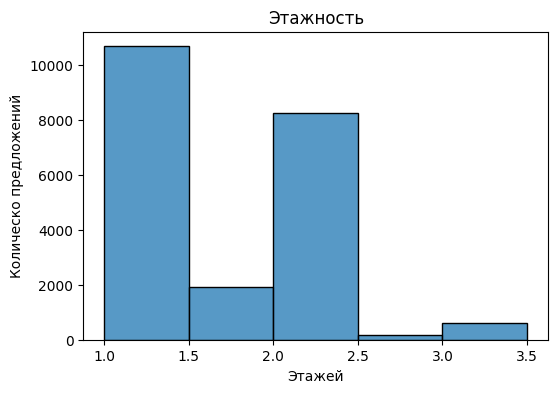

In [3]:
# 2.2. Изучите распределение этажей домов
plt.figure(figsize=(6, 4))

sns.histplot(df['floors'], bins=5)

plt.title('Этажность')
plt.xlabel('Этажей')
plt.ylabel('Колическо предложений');

Вывод: 1-2 этажные дома можно встретить гораздо чаще, чем дома 3 этажные.

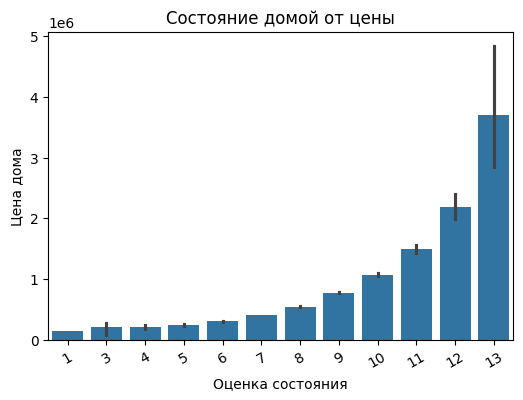

In [8]:
# 2.3. Изучите распределение состояния домов
plt.figure(figsize=(6, 4))

sns.barplot(x=df['grade'], y=df['price'])

plt.title('Состояние домой от цены')
plt.xlabel('Оценка состояния')
plt.ylabel('Цена дома')
plt.xticks(rotation=30);





Вывод: Наблюдаем нелинейную зависимость цены на дома от оценки состояния недвижимости. 

Чем лучше состояние тем дороже стоимость дома.

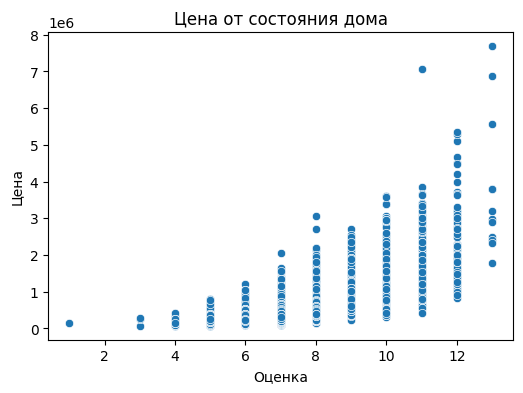

In [77]:
plt.figure(figsize=(6, 4))

sns.scatterplot(x=df['grade'], y=df['price'])

plt.title('Цена от состояния дома')
plt.xlabel('Оценка')
plt.ylabel('Цена');

Вывод: Явно видна линейная зависимость максимальной цены от Состояния дома (Оценки)

Условие 3: 3 задача

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, 
с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

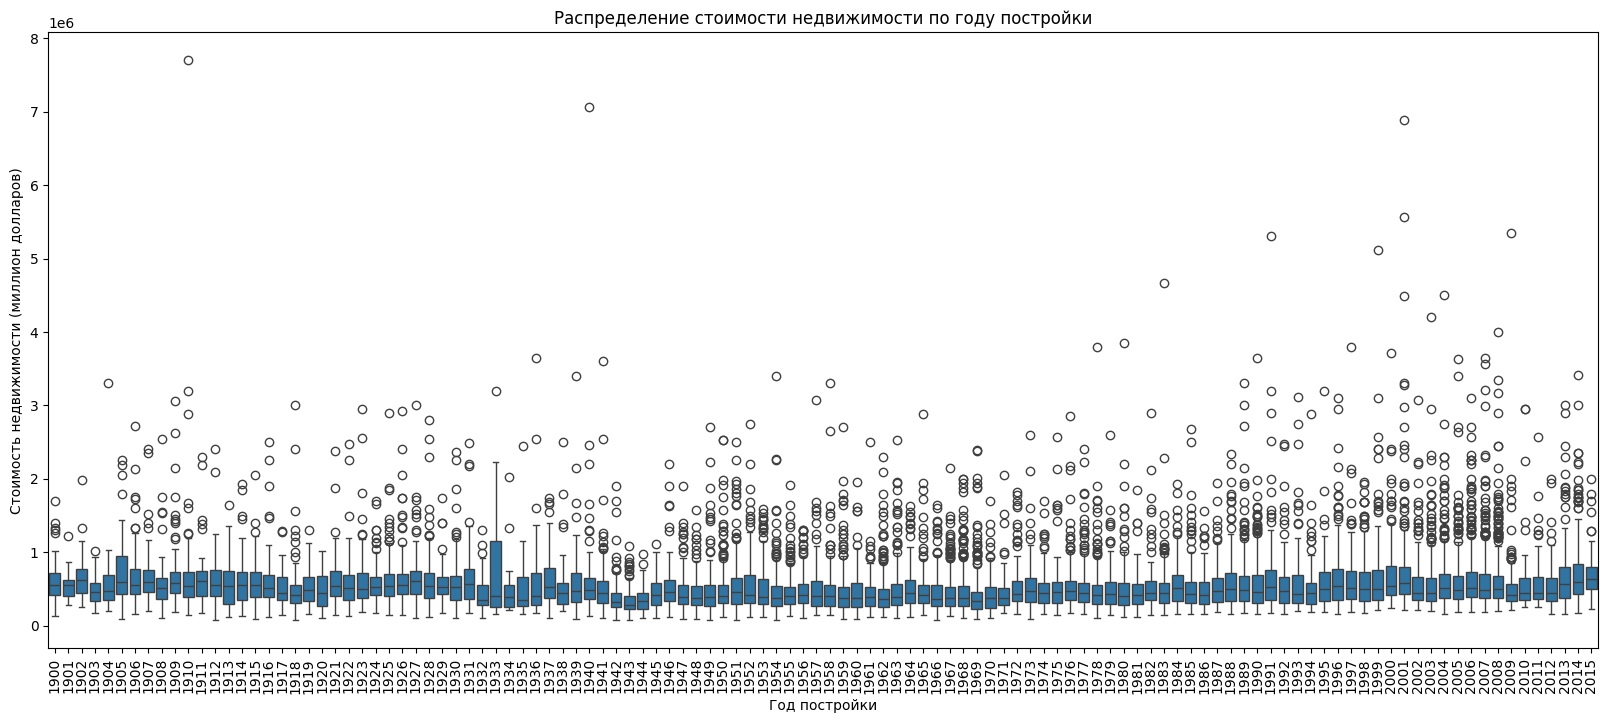

In [79]:
# График распределения стоимости недвижимости в зависимости от года постройки (box plot)
plt.figure(figsize=(20, 8))
sns.boxplot(df, x='yr_built', y='price')
plt.xlabel('Год постройки')
plt.ylabel('Стоимость')
plt.title('Распределение стоимости недвижимости по году постройки')
plt.xticks(rotation=90)
plt.show()

Вывод: Средняя стоимость домов и максимум стоимости отмечено на более новых домах. Более свежее жильё стоит дороже.

Общие выводы:

Согласно данных, стоимость недвижимости зависит от таких показателей как Оценка, Жилая площадь, Год постройки. 

Одноэтажных домов значительно больше чем домов больше 2х этажей. 

Выбор домика у моря сильно ограничен. 

Касательно общих статистических тенденций,- рынок недвижести растёт по колличеству предложений, либо с 1900 по 1950 был слабо належен учёт.